# Initialization


## Imports


In [1]:
from pyprojroot import here
import sys
# add here to path
sys.path.append(str(here()))
%matplotlib inline
from src.code.analysis_utils import *
import matplotlib.pyplot as plt
import numpy as np

/mnt/polished-lake/home/dwurgaft/.cache/pypoetry/virtualenvs/research-RNOK_ijJ-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read data


In [2]:
exp_name = "small-lm-exp"
setting = "balls-and-urns"
df_eval = load_eval_results(setting, exp_name)

metrics = df_eval.iloc[0]["metrics"]["standard"]
metrics_single_task = df_eval.iloc[0]["metrics"]["single_task"]

df_bayes = load_eval_results(setting, "bayes-eval")
metrics_bayes = df_bayes.iloc[0]["metrics"]["standard"]
metrics_single_task_bayes = df_bayes.iloc[0]["metrics"]["single_task"]

# Analysis

## Performance across context


/tmp/ipykernel_244407/1270845512.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_loss = torch.tensor(metrics["all_loss"]).mean(dim=0)


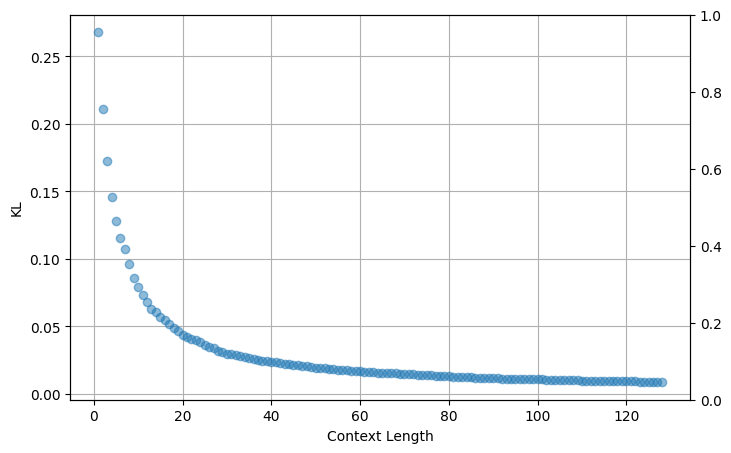

In [3]:
all_loss = torch.tensor(metrics["all_loss"]).mean(dim=0)
context_lengths = np.arange(1, len(all_loss) + 1)

# set up two figures 
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()

ax1.scatter(context_lengths, all_loss, alpha=0.5, color='C0', zorder=2)
ax1.set_xlabel("Context Length")
ax1.set_ylabel("KL")
ax1.grid(True)
